### Avant de lancer le notebook pour la préparation des données, récupérer les données brutes qui sont sur github dans le dossier data/processed (les données doit étre sur meme fichier que le notebook)

### les données utilisé ("consumption_alesund_per_groupe(API).csv","2m_temp_alesund.csv", 'wind_speed_alesund.csv', 'surface_pressure_alesund.csv', 'surface_pressure.csv', 'meteo_consump_alesund_data.csv' )

In [1]:
import pandas as pd
import numpy as np
# Visualisation
import matplotlib.pyplot as plt  # Visualisation classique
import seaborn as sns            # Visualisation avancée, corrélation, heatmaps, etc.

si vous avez besoin d'analyser directement ne lance pas cette partie passe à la 2eme partie de l'analyse 
cette partie c'est pour la concatenation des données conso et meteo

In [ ]:
df_consum_alesund_per_group=pd.read_csv('consumption_alesund_per_groupe(API).csv') # Consommation par groupe
df_temp_alesund=pd.read_csv('2m_temp_alesund.csv')  # Température à 2m
df_wind_speed_alesund=pd.read_csv('wind_speed_alesund.csv')  # Vitesse du vent
df_surf_pressure_alesund=pd.read_csv('surface_pressure_alesund.csv')

In [4]:
df_consum_alesund_per_group

Consumption_group_Ålesund  VOLUME_KWH  METERINGPOINT_COUNT  \
0                        private   58370.730                27060   
1                       industry   13259.716                 1029   
2                       business   30526.664                 3784   
3                        private   57961.562                27060   
4                       industry   13558.855                 1029   
...                          ...         ...                  ...   
115552                   private   47385.406                29305   
115553                  business   24504.025                 3373   
115554                  business   25000.594                 3373   
115555                   private   46403.700                29305   
115556                  industry   17578.795                  842   

                       Date  
0       2020-12-31 23:00:00  
1       2020-12-31 23:00:00  
2       2020-12-31 23:00:00  
3       2021-01-01 00:00:00  
4       2021-01-01 00:00:00  
...                     ...  
115552  2025-05-24 20:00:00  
115553  2025-05-24 20:00:00  
115554  2025-05-24 21:00:00  
115555  2025-05-24 21:00:00  
115556  2025-05-24 21:00:00  

[115557 rows x 4 columns]

In [5]:
df_temp_alesund

Date    t2m_C
0      2021-01-01 00:00:00  1.68923
1      2021-01-01 01:00:00  1.32168
2      2021-01-01 02:00:00  1.01553
3      2021-01-01 03:00:00  0.77847
4      2021-01-01 04:00:00  0.66543
...                    ...      ...
38481  2025-05-23 09:00:00  7.13670
38482  2025-05-23 10:00:00  7.29067
38483  2025-05-23 11:00:00  7.41450
38484  2025-05-23 12:00:00  7.47912
38485  2025-05-23 13:00:00  7.63406

[38486 rows x 2 columns]

In [6]:
df_wind_speed_alesund

Date  wind_speed
0      2021-01-01 00:00:00    2.798005
1      2021-01-01 01:00:00    2.630726
2      2021-01-01 02:00:00    2.387332
3      2021-01-01 03:00:00    1.984651
4      2021-01-01 04:00:00    1.515596
...                    ...         ...
38457  2025-05-22 09:00:00    7.053196
38458  2025-05-22 10:00:00    6.203830
38459  2025-05-22 11:00:00    6.664502
38460  2025-05-22 12:00:00    7.096274
38461  2025-05-22 13:00:00    7.511066

[38462 rows x 2 columns]

In [ ]:
import pandas as pd
from functools import reduce # Pour fusionner plusieurs DataFrames

# Liste des DataFrames météo
df_meteo_list = [df_wind_speed_alesund, df_temp_alesund, df_surf_pressure_alesund]

# Assurer que toutes les dates sont bien au format datetime
df_consum_alesund_per_group['Date'] = pd.to_datetime(df_consum_alesund_per_group['Date'])
for df in df_meteo_list:
    df['Date'] = pd.to_datetime(df['Date'])

#  trouver les dates communes à tous les DataFrames
common_dates = set(df_consum_alesund_per_group['Date'])
for df in df_meteo_list:
    common_dates &= set(df['Date'])

# filtrer tous les DataFrames sur ces dates communes
df_consum_filtered = df_consum_alesund_per_group[df_consum_alesund_per_group['Date'].isin(common_dates)]
df_meteo_filtered_list = [df[df['Date'].isin(common_dates)] for df in df_meteo_list]

# joindre les DataFrames météo à gauche sur le DataFrame consommation
df_final = df_consum_filtered.copy()
for df_meteo in df_meteo_filtered_list:
    df_final = pd.merge(df_final, df_meteo, on='Date', how='left')

# Résultat
df_final.head()


Consumption_group_Ålesund  VOLUME_KWH  METERINGPOINT_COUNT  \
0                   private   57961.562                27060   
1                  industry   13558.855                 1029   
2                  business   30582.870                 3784   
3                   private   56258.645                27060   
4                  industry   13649.810                 1029   

                 Date  wind_speed    t2m_C  surface_pressure  
0 2021-01-01 00:00:00    2.798005  1.68923          98874.56  
1 2021-01-01 00:00:00    2.798005  1.68923          98874.56  
2 2021-01-01 00:00:00    2.798005  1.68923          98874.56  
3 2021-01-01 01:00:00    2.630726  1.32168          98905.06  
4 2021-01-01 01:00:00    2.630726  1.32168          98905.06

In [8]:
df_data_alesund=df_final

In [9]:
df_data_alesund

Consumption_group_Ålesund  VOLUME_KWH  METERINGPOINT_COUNT  \
0                        private   57961.562                27060   
1                       industry   13558.855                 1029   
2                       business   30582.870                 3784   
3                        private   56258.645                27060   
4                       industry   13649.810                 1029   
...                          ...         ...                  ...   
115381                  industry   35091.887                  841   
115382                  business   40168.360                 3372   
115383                   private   41597.290                29305   
115384                  industry   29187.640                  841   
115385                  business   38377.207                 3372   

                      Date  wind_speed    t2m_C  surface_pressure  
0      2021-01-01 00:00:00    2.798005  1.68923          98874.56  
1      2021-01-01 00:00:00    2.798005  1.68923          98874.56  
2      2021-01-01 00:00:00    2.798005  1.68923          98874.56  
3      2021-01-01 01:00:00    2.630726  1.32168          98905.06  
4      2021-01-01 01:00:00    2.630726  1.32168          98905.06  
...                    ...         ...      ...               ...  
115381 2025-05-22 12:00:00    7.096274  7.26953          99859.81  
115382 2025-05-22 12:00:00    7.096274  7.26953          99859.81  
115383 2025-05-22 13:00:00    7.511066  7.41530          99855.31  
115384 2025-05-22 13:00:00    7.511066  7.41530          99855.31  
115385 2025-05-22 13:00:00    7.511066  7.41530          99855.31  

[115386 rows x 7 columns]

In [10]:
nan_par_colonne = df_data_alesund.isna().sum()
print(nan_par_colonne)

Consumption_group_Ålesund    0
VOLUME_KWH                   0
METERINGPOINT_COUNT          0
Date                         0
wind_speed                   0
t2m_C                        0
surface_pressure             0
dtype: int64


In [ ]:
df_data_alesund.to_csv('meteo_consump_alesund_data.csv' , index=False) # Enregistrer le DataFrame final dans un fichier CSV

# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

### Analyse 


pour l'analyse on commence d'ici avec dataframe déja fusionner 

In [ ]:
df_alesund_data=pd.read_csv("meteo_consump_alesund_data.csv") # pour l'analyse on commence d'ici avec dataframe déja fusionner

In [3]:
#  Conversion de la colonne Date en datetime
df_alesund_data['Date'] = pd.to_datetime(df_alesund_data['Date'])

#  Définir la colonne Date comme index
df_alesund_data = df_alesund_data.set_index('Date')

In [4]:
df_alesund_data

Consumption_group_Ålesund  VOLUME_KWH  \
Date                                                        
2021-01-01 00:00:00                   private   57961.562   
2021-01-01 00:00:00                  industry   13558.855   
2021-01-01 00:00:00                  business   30582.870   
2021-01-01 01:00:00                   private   56258.645   
2021-01-01 01:00:00                  industry   13649.810   
...                                       ...         ...   
2025-05-22 12:00:00                  industry   35091.887   
2025-05-22 12:00:00                  business   40168.360   
2025-05-22 13:00:00                   private   41597.290   
2025-05-22 13:00:00                  industry   29187.640   
2025-05-22 13:00:00                  business   38377.207   

                     METERINGPOINT_COUNT  wind_speed    t2m_C  \
Date                                                            
2021-01-01 00:00:00                27060    2.798005  1.68923   
2021-01-01 00:00:00                 1029    2.798005  1.68923   
2021-01-01 00:00:00                 3784    2.798005  1.68923   
2021-01-01 01:00:00                27060    2.630726  1.32168   
2021-01-01 01:00:00                 1029    2.630726  1.32168   
...                                  ...         ...      ...   
2025-05-22 12:00:00                  841    7.096274  7.26953   
2025-05-22 12:00:00                 3372    7.096274  7.26953   
2025-05-22 13:00:00                29305    7.511066  7.41530   
2025-05-22 13:00:00                  841    7.511066  7.41530   
2025-05-22 13:00:00                 3372    7.511066  7.41530   

                     surface_pressure  
Date                                   
2021-01-01 00:00:00          98874.56  
2021-01-01 00:00:00          98874.56  
2021-01-01 00:00:00          98874.56  
2021-01-01 01:00:00          98905.06  
2021-01-01 01:00:00          98905.06  
...                               ...  
2025-05-22 12:00:00          99859.81  
2025-05-22 12:00:00          99859.81  
2025-05-22 13:00:00          99855.31  
2025-05-22 13:00:00          99855.31  
2025-05-22 13:00:00          99855.31  

[115386 rows x 6 columns]

In [5]:
print(f"Nombre de lignes : {len(df_alesund_data)}")  # Vérification de nombre de lignes

print(f"Période couverte : de {df_alesund_data.index.min()} à {df_alesund_data.index.max()}") # Vérification les bornes temporelles (période couverte)

Nombre de lignes : 115386
Période couverte : de 2021-01-01 00:00:00 à 2025-05-22 13:00:00


In [6]:
df_alesund_data.dtypes  # Vérification des types de données

Consumption_group_Ålesund     object
VOLUME_KWH                   float64
METERINGPOINT_COUNT            int64
wind_speed                   float64
t2m_C                        float64
surface_pressure             float64
dtype: object

In [7]:
float_cols = df_alesund_data.select_dtypes(include=['float64'])    # Sélectionner les colonnes de type float
float_cols.describe()  # Statistiques descriptives des colonnes de type float

VOLUME_KWH     wind_speed          t2m_C  surface_pressure
count  115386.000000  115386.000000  115386.000000     115386.000000
mean    33953.673169       4.836656       6.761588      99329.896076
std     15274.681933       2.629211       5.322094       1277.578013
min      7390.212000       0.013090      -9.591220      93887.190000
25%     22294.303500       2.896206       2.819480      98524.500000
50%     30233.104000       4.372075       6.543270      99418.060000
75%     42729.886250       6.301616      11.247580     100229.440000
max     93521.390000      18.332586      22.584380     102800.250000

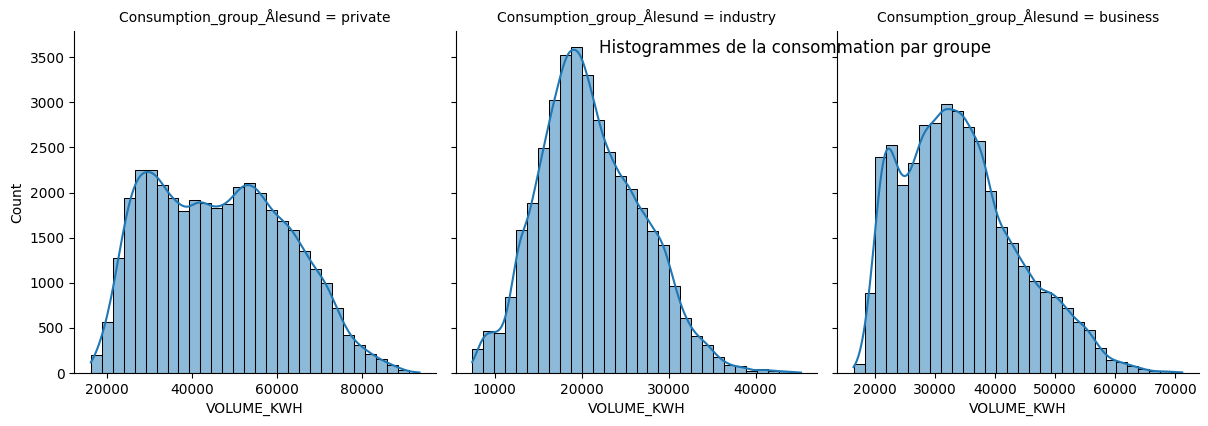

In [8]:
g = sns.FacetGrid(df_alesund_data, col="Consumption_group_Ålesund", col_wrap=4, height=4, sharex=False)   # Création d'une grille de sous-graphes pour chaque groupe de consommation
g.map(sns.histplot, "VOLUME_KWH", bins=30, kde=True)     # Tracer un histogramme avec une estimation de la densité (KDE)
g.fig.subplots_adjust(top=1)   # Ajuster l'espacement pour le titre
g.fig.suptitle('Histogrammes de la consommation par groupe')
plt.show()


C:\Users\emac\AppData\Local\Temp\ipykernel_8256\481750661.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')['VOLUME_KWH'] # Moyenne mensuelle de la consommation


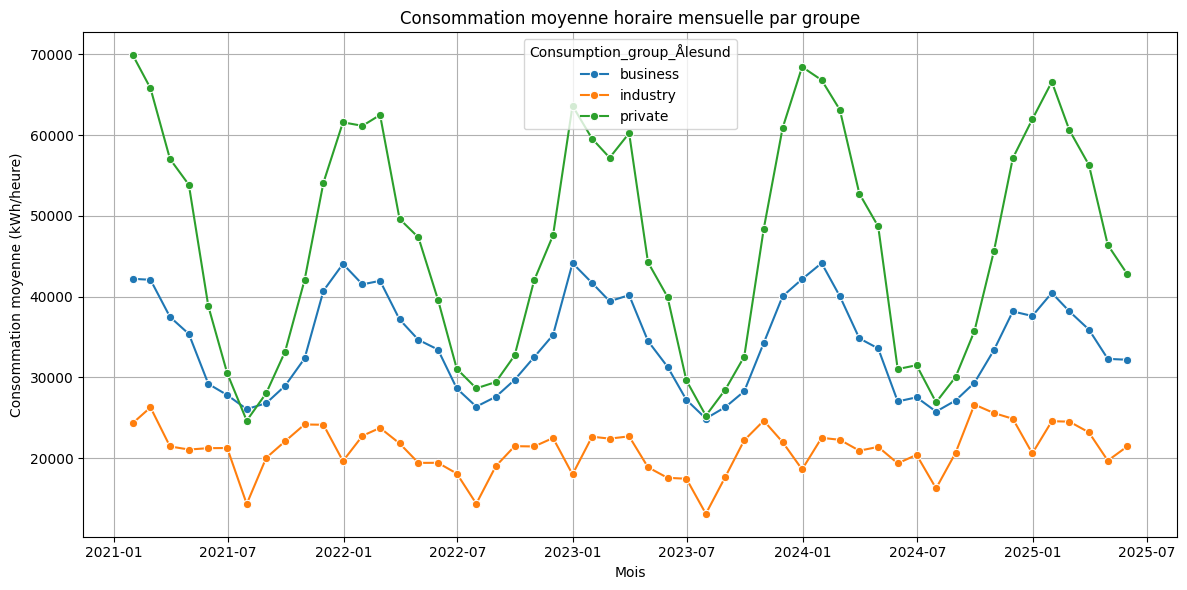

In [9]:
# Groupby + resample pour obtenir la moyenne mensuelle
monthly_avg = (
    df_alesund_data
    .groupby('Consumption_group_Ålesund')  # Groupement par groupe de consommation
    .resample('M')['VOLUME_KWH'] # Moyenne mensuelle de la consommation
    .mean()    
    .reset_index()
)

#  Visualisation
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_avg,
    x='Date',
    y='VOLUME_KWH',
    hue='Consumption_group_Ålesund',
    marker='o'
)
plt.title("Consommation moyenne horaire mensuelle par groupe")
plt.xlabel("Mois")
plt.ylabel("Consommation moyenne (kWh/heure)")
plt.grid(True)
plt.tight_layout()
plt.show()


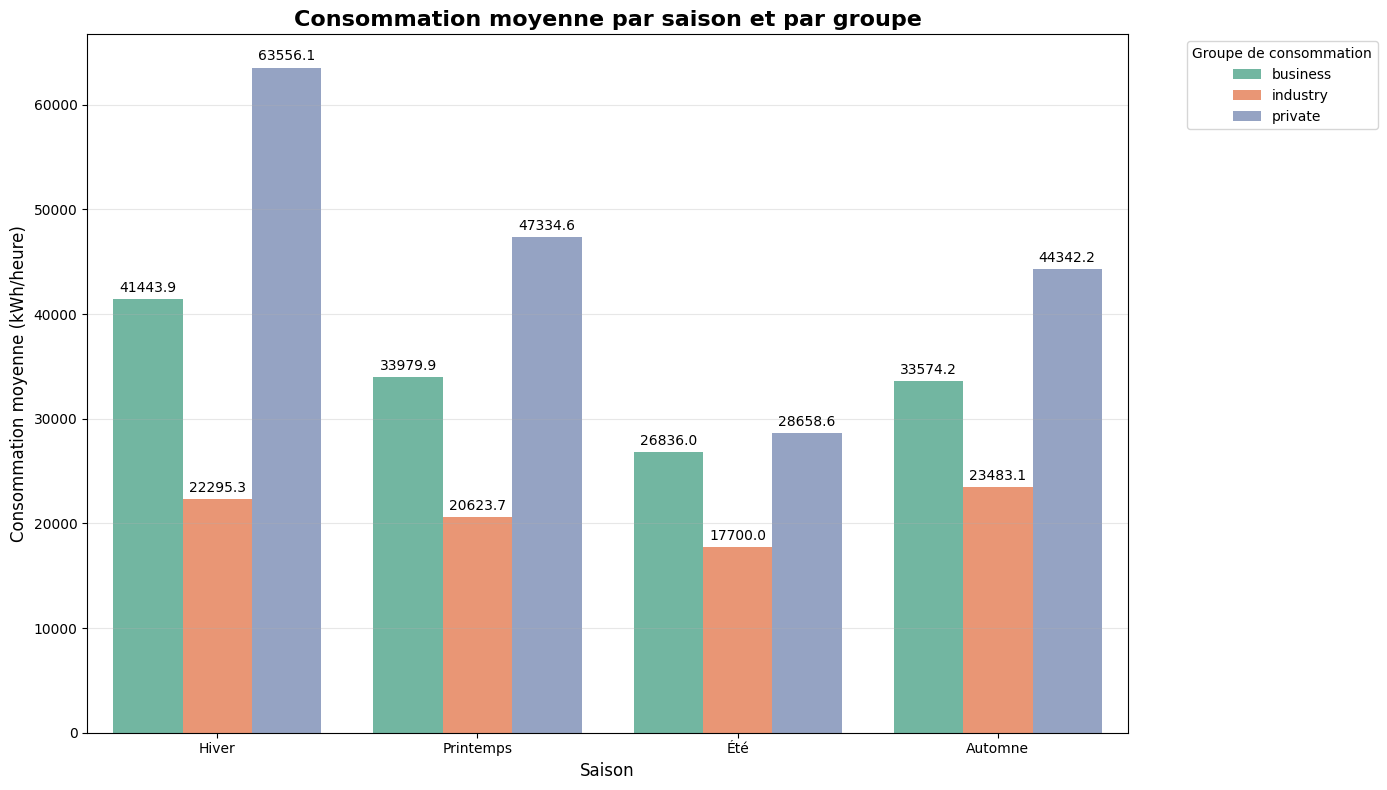

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Étape 1 : S'assurer que l'index est en datetime
if not pd.api.types.is_datetime64_any_dtype(df_alesund_data.index):
    df_alesund_data.index = pd.to_datetime(df_alesund_data.index, errors='coerce')

df_alesund_data = df_alesund_data[~df_alesund_data.index.isna()]

# Étape 2 : Extraire le mois depuis l’index
df_alesund_data['Mois_num'] = df_alesund_data.index.month  # 1 à 12

# Étape 3 : Définir la fonction de saison
def get_saison(mois):
    if mois in [12, 1, 2]:
        return 'Hiver'
    elif mois in [3, 4, 5]:
        return 'Printemps'
    elif mois in [6, 7, 8]:
        return 'Été'
    else:  # mois in [9, 10, 11]
        return 'Automne'

# Étape 4 : Appliquer la fonction
df_alesund_data['Saison'] = df_alesund_data['Mois_num'].apply(get_saison)

# Étape 5 : Calcul de la consommation moyenne par saison et par groupe
seasonal_avg = (
    df_alesund_data
    .groupby(['Consumption_group_Ålesund', 'Saison'])['VOLUME_KWH']
    .mean()
    .reset_index()
)

# Étape 6 : Ordre saisonnier
ordre_saisons = ['Hiver', 'Printemps', 'Été', 'Automne']
seasonal_avg['Saison'] = pd.Categorical(seasonal_avg['Saison'], categories=ordre_saisons, ordered=True)

# Étape 7 : Visualisation en barres
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=seasonal_avg,
    x='Saison',
    y='VOLUME_KWH',
    hue='Consumption_group_Ålesund',
    palette='Set2'
)

# Ajout des étiquettes sur les barres
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', padding=3)

plt.title("Consommation moyenne par saison et par groupe", fontsize=16, fontweight='bold')
plt.xlabel("Saison", fontsize=12)
plt.ylabel("Consommation moyenne (kWh/heure)", fontsize=12)
plt.legend(title="Groupe de consommation", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


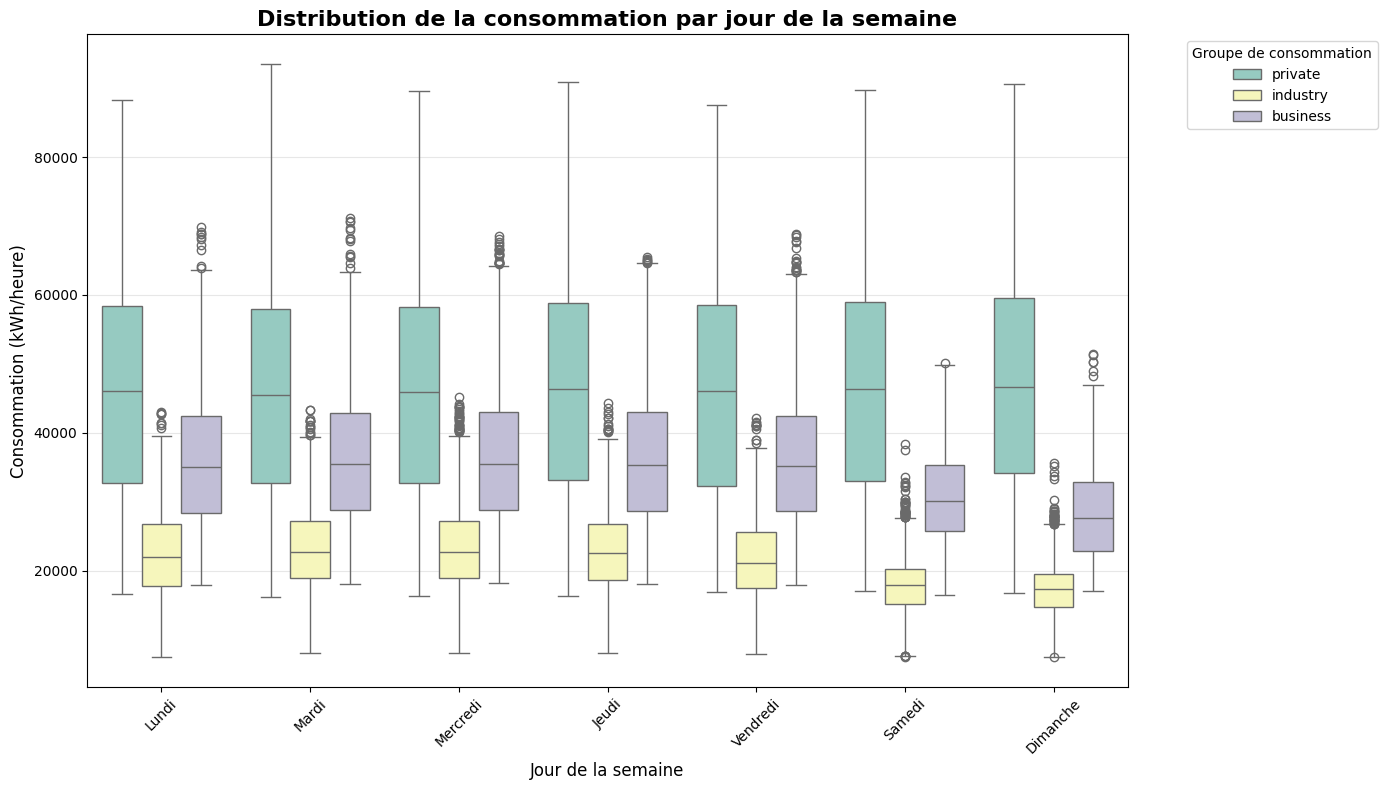

In [12]:
# Créer la colonne jour de la semaine
df_alesund_data['Jour_semaine'] = df_alesund_data.index.day_name()   # Extraire le jour de la semaine à partir de l'index datetime

# Définir l'ordre des jours de la semaine (en français)
jours_ordre = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
jours_fr = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']

# Mapper les jours en français
jour_mapping = dict(zip(jours_ordre, jours_fr))
df_alesund_data['Jour_semaine_fr'] = df_alesund_data['Jour_semaine'].map(jour_mapping)   # Remplacer les noms des jours en anglais par les noms en français

# Créer une colonne catégorielle ordonnée
df_alesund_data['Jour_semaine_fr'] = pd.Categorical(
    df_alesund_data['Jour_semaine_fr'], 
    categories=jours_fr, 
    ordered=True
)

# Créer le boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=df_alesund_data,
    x='Jour_semaine_fr',
    y='VOLUME_KWH',
    hue='Consumption_group_Ålesund',
    palette='Set3'
)

plt.title("Distribution de la consommation par jour de la semaine", fontsize=16, fontweight='bold')
plt.xlabel("Jour de la semaine", fontsize=12)
plt.ylabel("Consommation (kWh/heure)", fontsize=12)
plt.legend(title="Groupe de consommation", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



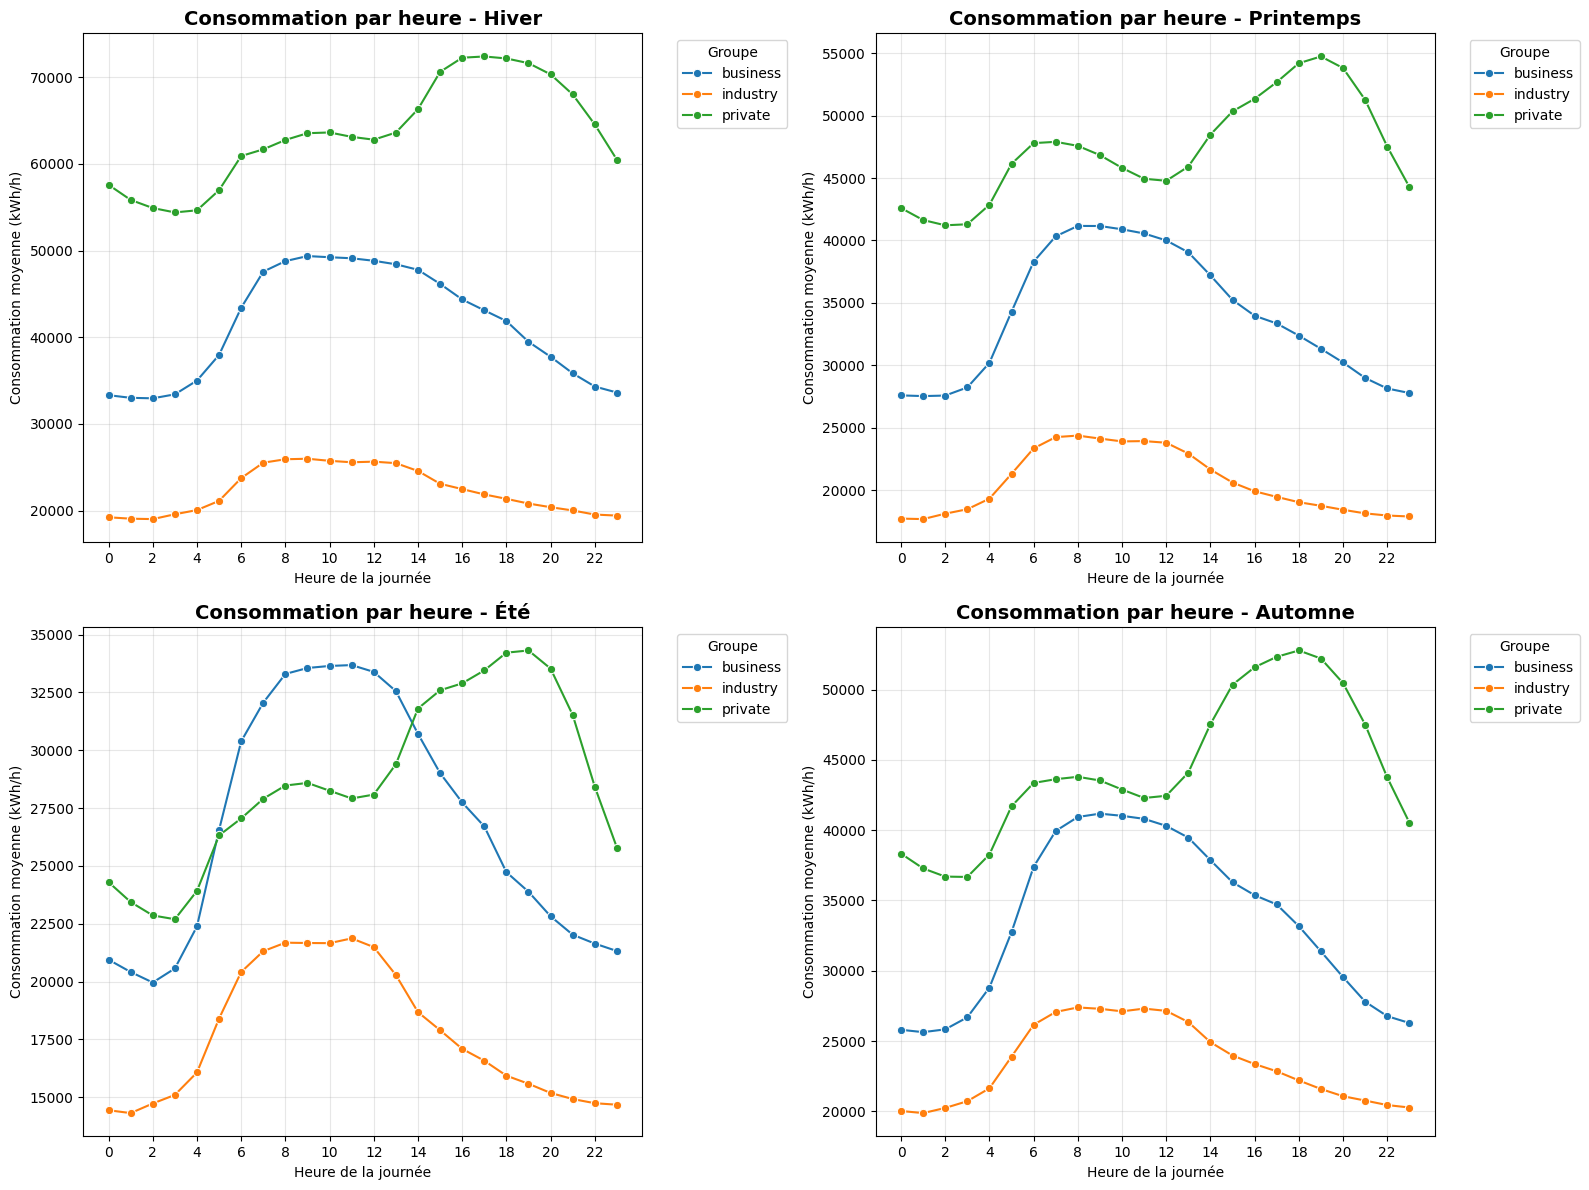

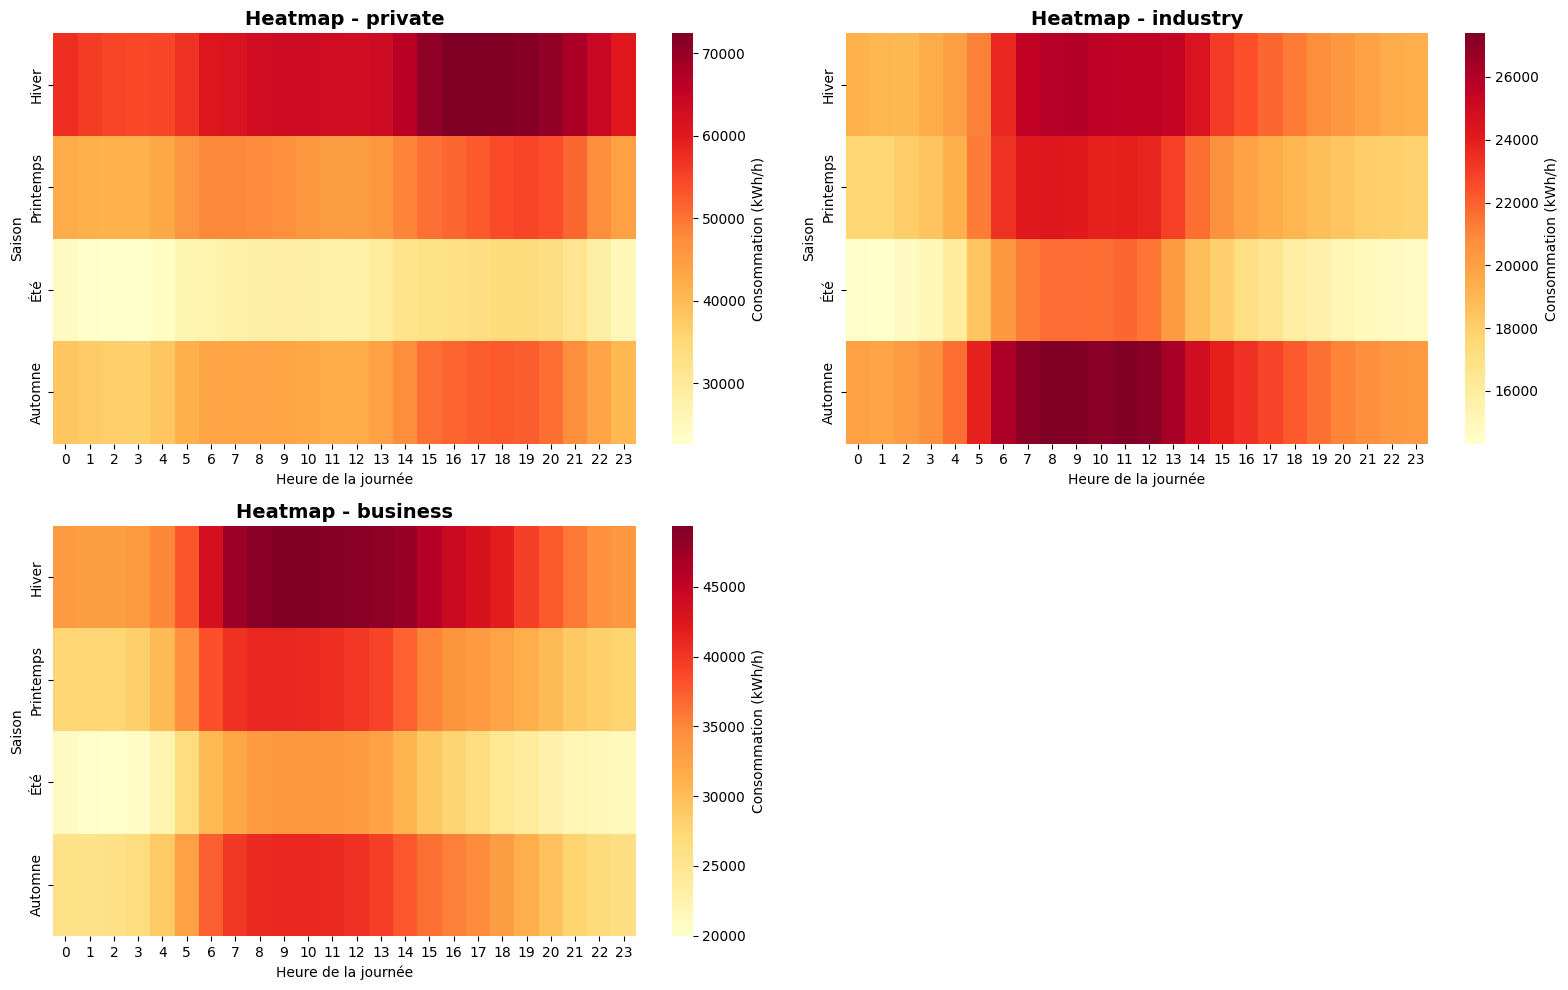

In [13]:
# Créer les colonnes nécessaires
df_alesund_data['Heure'] = df_alesund_data.index.hour
df_alesund_data['Mois'] = df_alesund_data.index.month

# Définir les saisons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Hiver'
    elif month in [3, 4, 5]:
        return 'Printemps'
    elif month in [6, 7, 8]:
        return 'Été'
    else:  # [9, 10, 11]
        return 'Automne'

df_alesund_data['Saison'] = df_alesund_data['Mois'].apply(get_season)

# Calculer la consommation moyenne par heure, groupe et saison
hourly_seasonal_avg = (
    df_alesund_data
    .groupby(['Consumption_group_Ålesund', 'Saison', 'Heure'])['VOLUME_KWH']
    .mean()
    .reset_index()
)

# Définir l'ordre des saisons
saisons_ordre = ['Hiver', 'Printemps', 'Été', 'Automne']
hourly_seasonal_avg['Saison'] = pd.Categorical(
    hourly_seasonal_avg['Saison'], 
    categories=saisons_ordre, 
    ordered=True
)

# Créer la visualisation avec subplots par saison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, saison in enumerate(saisons_ordre):
    data_saison = hourly_seasonal_avg[hourly_seasonal_avg['Saison'] == saison]
    
    sns.lineplot(
        data=data_saison,
        x='Heure',
        y='VOLUME_KWH',
        hue='Consumption_group_Ålesund',
        marker='o',
        ax=axes[i]
    )
    
    axes[i].set_title(f"Consommation par heure - {saison}", fontsize=14, fontweight='bold')
    axes[i].set_xlabel("Heure de la journée")
    axes[i].set_ylabel("Consommation moyenne (kWh/h)")
    axes[i].grid(True, alpha=0.3)
    axes[i].set_xticks(range(0, 24, 2))
    axes[i].legend(title="Groupe", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Créer une heatmap pour visualiser tous les patterns
plt.figure(figsize=(16, 10))

# Préparer les données pour la heatmap
for i, group in enumerate(df_alesund_data['Consumption_group_Ålesund'].unique()):
    plt.subplot(2, 2, i+1)
    
    # Filtrer par groupe
    data_group = hourly_seasonal_avg[hourly_seasonal_avg['Consumption_group_Ålesund'] == group]
    
    # Créer un pivot pour la heatmap
    heatmap_data = data_group.pivot(index='Saison', columns='Heure', values='VOLUME_KWH')
    
    sns.heatmap(
        heatmap_data,
        cmap='YlOrRd',
        annot=False,
        fmt='.1f',
        cbar_kws={'label': 'Consommation (kWh/h)'}
    )
    
    plt.title(f"Heatmap - {group}", fontsize=14, fontweight='bold')
    plt.xlabel("Heure de la journée")
    plt.ylabel("Saison")

plt.tight_layout()
plt.show()



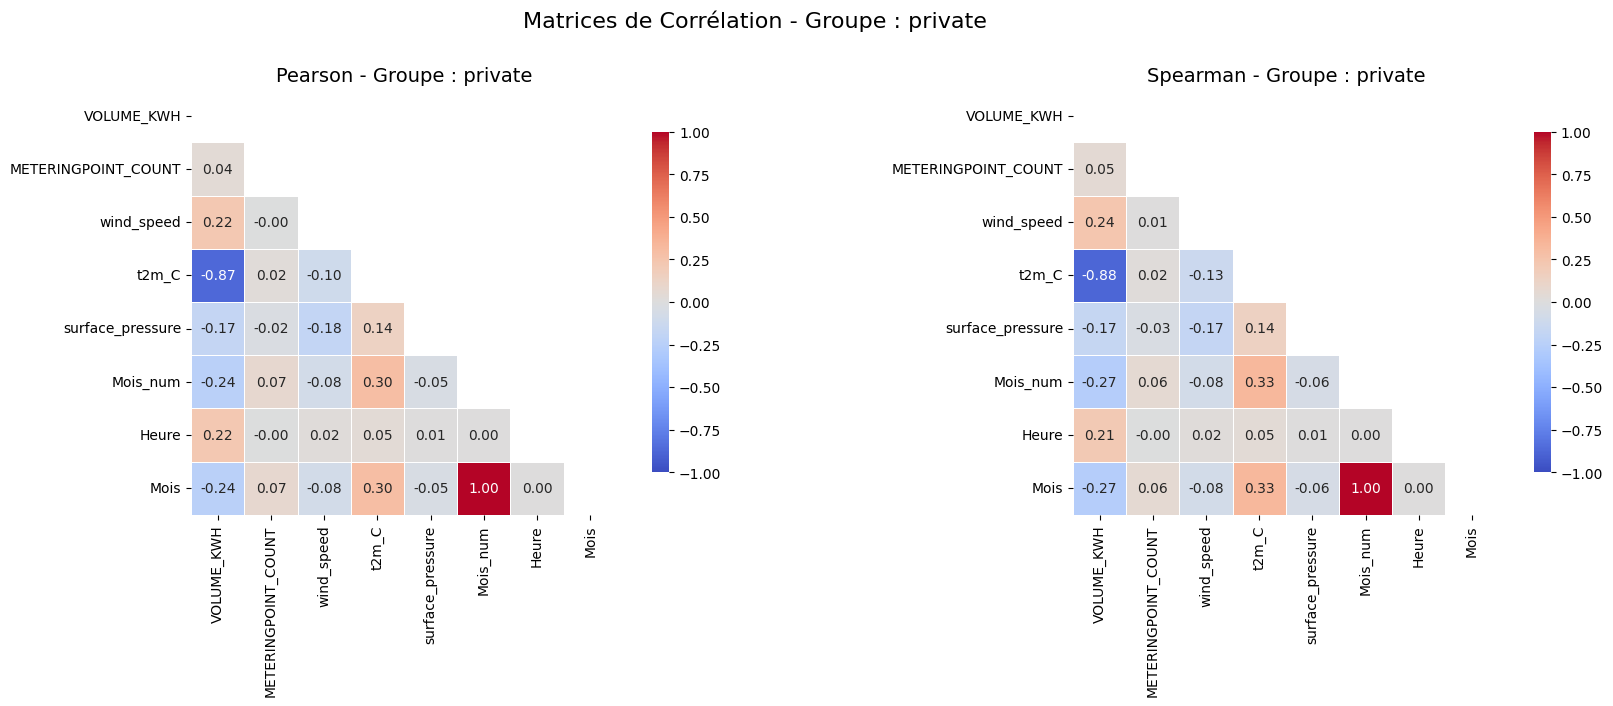

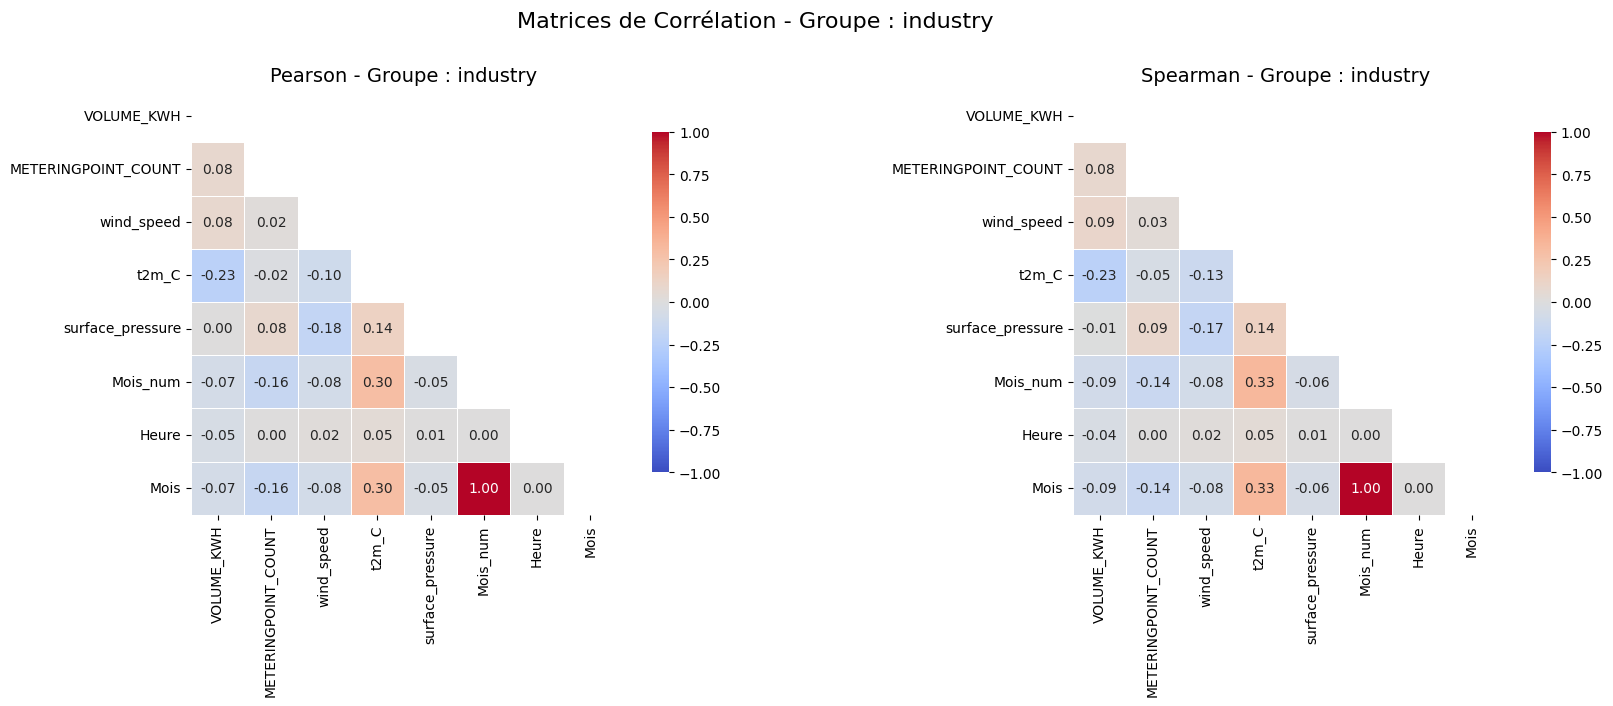

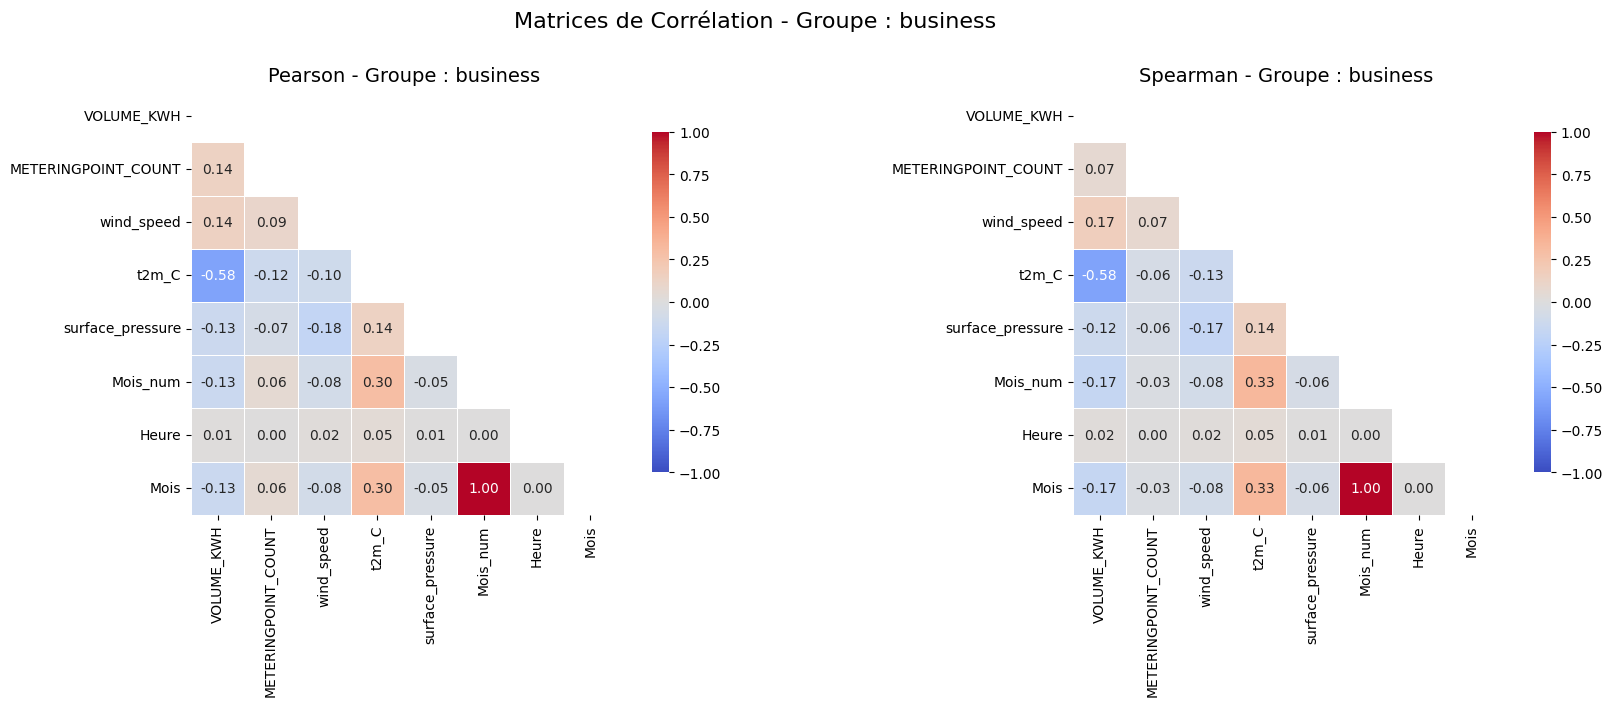

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Boucle sur chaque groupe unique
for group in df_alesund_data['Consumption_group_Ålesund'].unique():
    
    # Filtrage du DataFrame pour ce groupe
    df_group = df_alesund_data[df_alesund_data['Consumption_group_Ålesund'] == group]
    
    # Sélection des colonnes numériques uniquement
    df_numeric = df_group.select_dtypes(include=['number'])
    
    # Vérification qu'on a assez de données
    if df_numeric.shape[0] < 2:
        print(f"Groupe {group} : pas assez de données pour calculer une corrélation.")
        continue

    # Calcul des matrices de corrélation
    pearson_corr = df_numeric.corr(method='pearson')
    spearman_corr = df_numeric.corr(method='spearman')

    # Masque triangulaire supérieur (évite les doublons visuels)
    mask = np.triu(np.ones_like(pearson_corr, dtype=bool))

    # === Création de la figure avec deux sous-graphes ===
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))  # 1 ligne, 2 colonnes

    # === Heatmap Pearson ===
    sns.heatmap(
        pearson_corr,
        mask=mask,
        annot=True,
        cmap='coolwarm',
        vmin=-1, vmax=1,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.8},
        fmt=".2f",
        ax=axes[0]  # heatmap sur le premier subplot
    )
    axes[0].set_title(f"Pearson - Groupe : {group}", fontsize=14)

    # === Heatmap Spearman ===
    sns.heatmap(
        spearman_corr,
        mask=mask,
        annot=True,
        cmap='coolwarm',
        vmin=-1, vmax=1,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.8},
        fmt=".2f",
        ax=axes[1]  # heatmap sur le deuxième subplot
    )
    axes[1].set_title(f"Spearman - Groupe : {group}", fontsize=14)

    # Mise en forme globale
    plt.suptitle(f"Matrices de Corrélation - Groupe : {group}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Laisser de l'espace pour le titre
    plt.show()


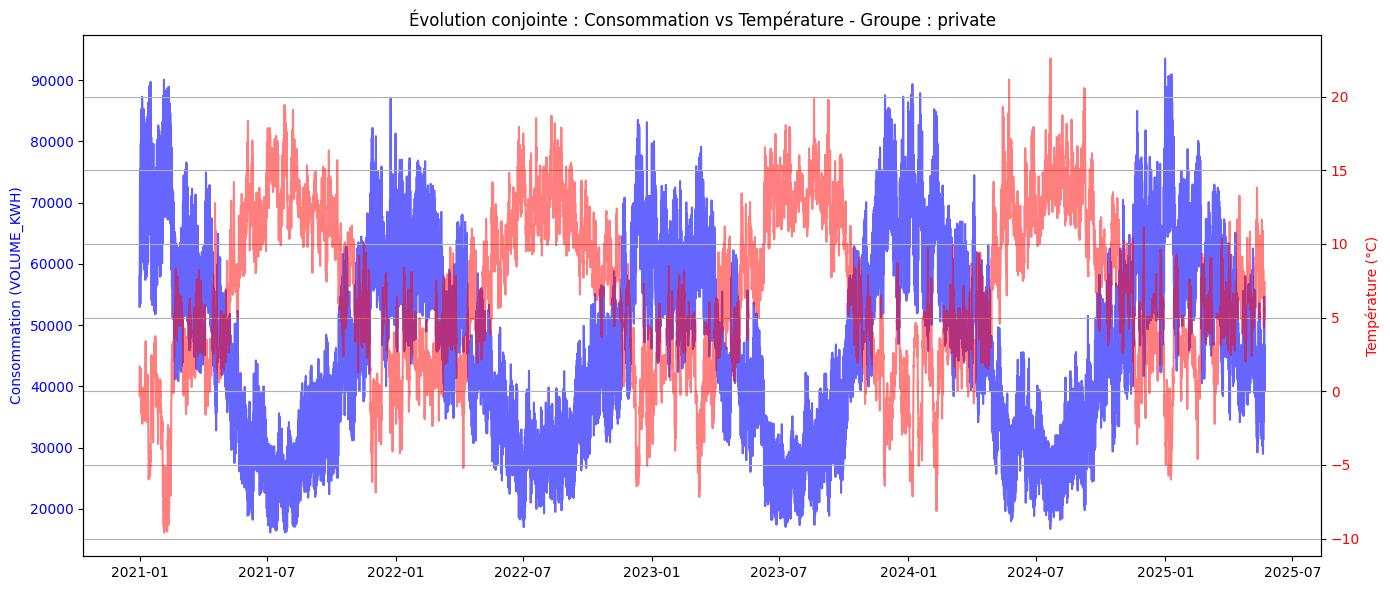

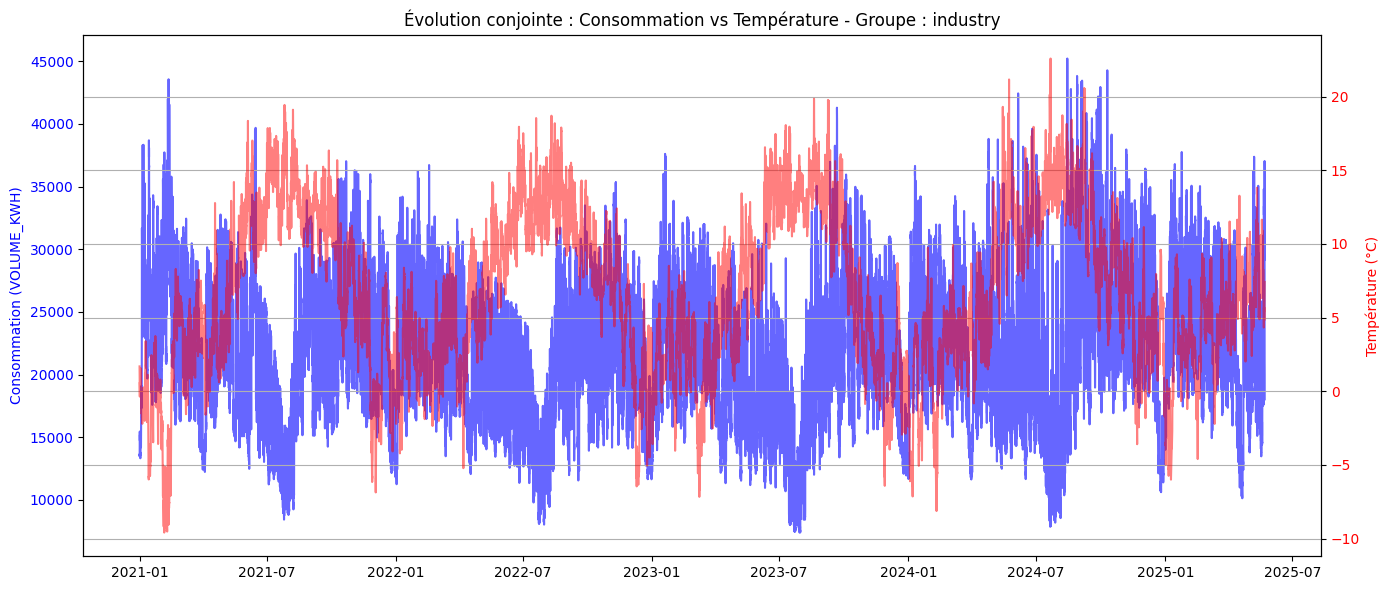

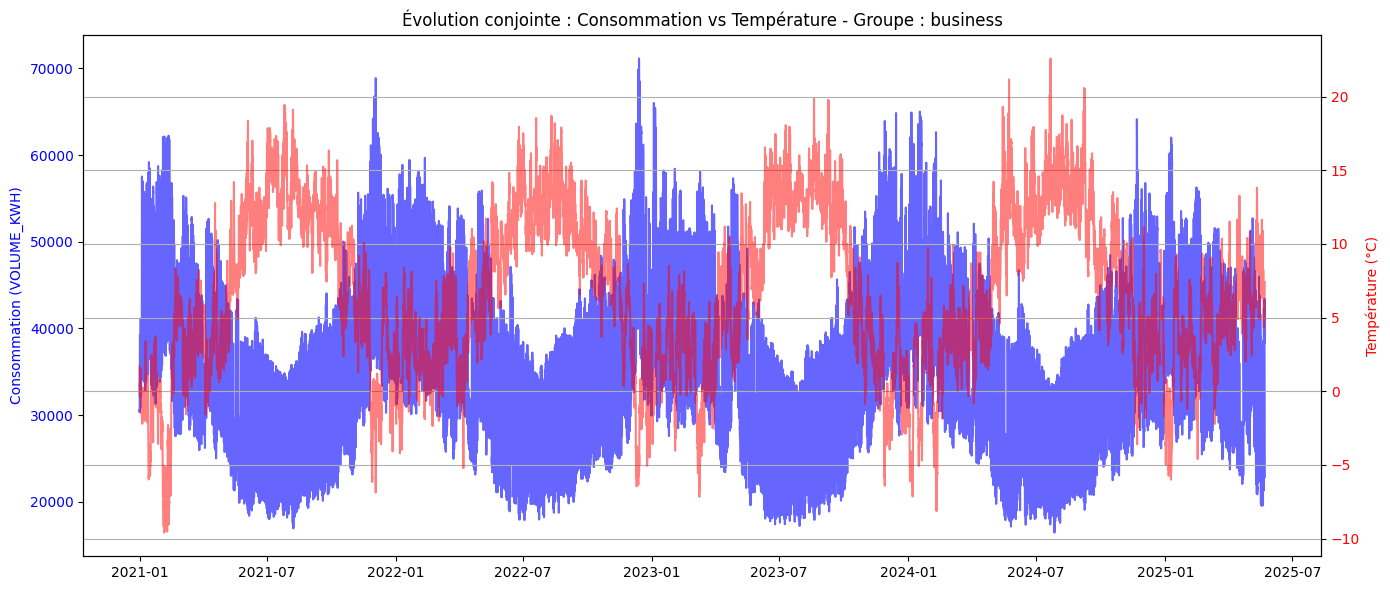

In [16]:


# Boucle sur chaque groupe de consommation
for group in df_alesund_data['Consumption_group_Ålesund'].unique():
    
    # Sous-ensemble du DataFrame pour ce groupe
    subset = df_alesund_data[df_alesund_data['Consumption_group_Ålesund'] == group]

    # Vérifie qu’il y a assez de données
    if subset.shape[0] < 2:
        print(f"Groupe {group} : pas assez de données.")
        continue

    # Création de la figure
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Axe Y gauche : VOLUME_KWH
    ax1.set_ylabel('Consommation (VOLUME_KWH)', color='blue')
    ax1.plot(subset.index, subset['VOLUME_KWH'], color='blue', alpha=0.6, label='Consommation')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Axe Y droit : t2m_C
    ax2 = ax1.twinx()
    ax2.set_ylabel('Température (°C)', color='red')
    ax2.plot(subset.index, subset['t2m_C'], color='red', alpha=0.5, label='Température')
    ax2.tick_params(axis='y', labelcolor='red')

    # Titre et grille
    plt.title(f"Évolution conjointe : Consommation vs Température - Groupe : {group}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


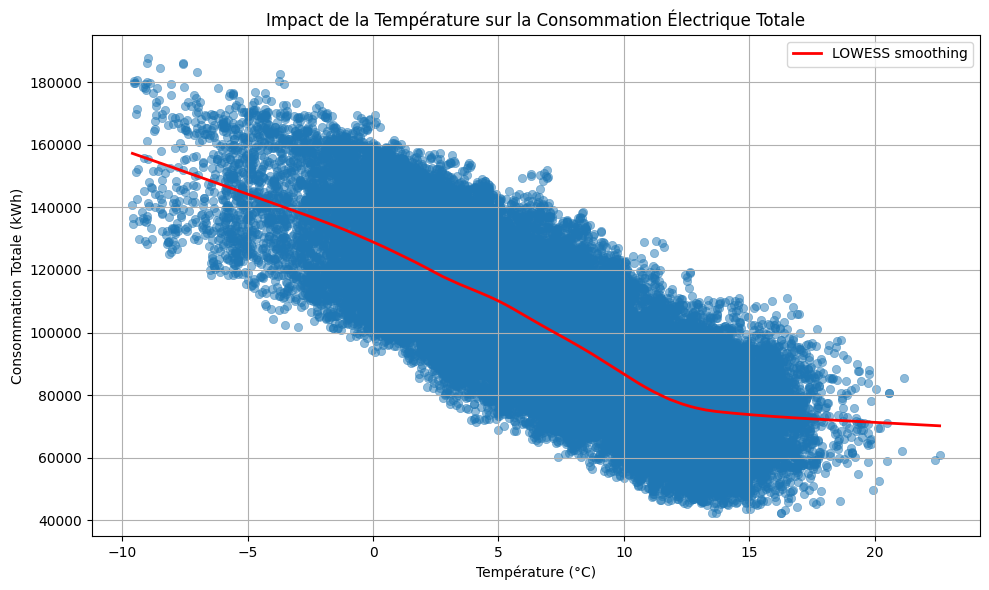

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  # Pour LOWESS



# Agréger les données par date
df_daily = df_alesund_data.groupby('Date').agg({
    'VOLUME_KWH': 'sum',          # somme des 3 groupes
    't2m_C': 'first'              # la température est la même pour tous les groupes
}).reset_index()

# Appliquer LOWESS
lowess = sm.nonparametric.lowess
smoothed = lowess(df_daily['VOLUME_KWH'], df_daily['t2m_C'], frac=0.3)

# Étape 3 : Visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_daily, x='t2m_C', y='VOLUME_KWH', alpha=0.5, edgecolor=None)
plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', linewidth=2, label='LOWESS smoothing')
plt.title("Impact de la Température sur la Consommation Électrique Totale")
plt.xlabel("Température (°C)")
plt.ylabel("Consommation Totale (kWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


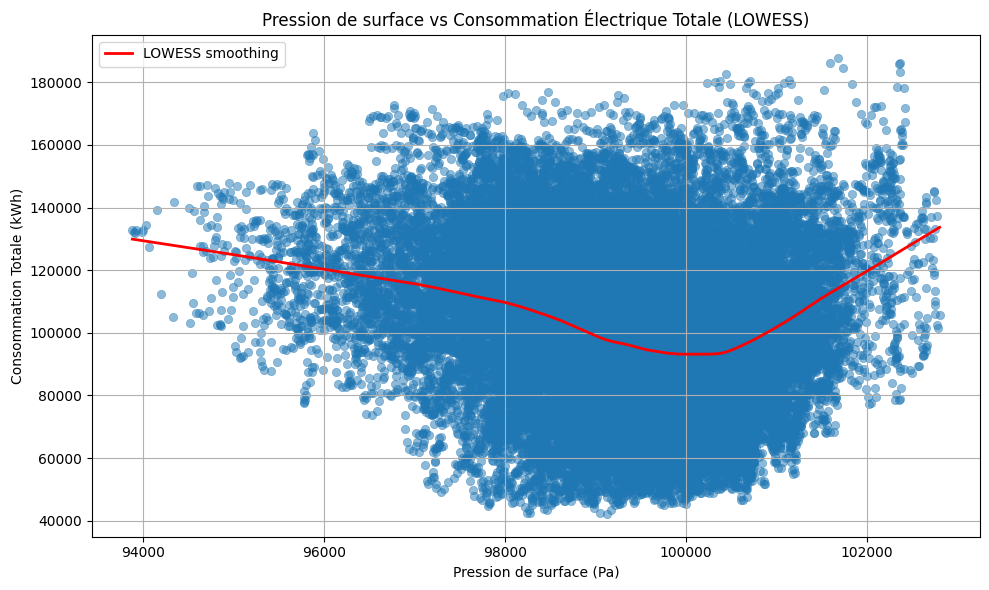

In [18]:


# Agréger les données par date
df_daily = df_alesund_data.groupby('Date').agg({
    'VOLUME_KWH': 'sum',              # Somme des 3 groupes
    'surface_pressure': 'first'       # Pression identique pour les 3 groupes à chaque date
}).reset_index()

# Appliquer LOWESS
lowess = sm.nonparametric.lowess
smoothed = lowess(df_daily['VOLUME_KWH'], df_daily['surface_pressure'], frac=0.3)

#  Visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_daily, x='surface_pressure', y='VOLUME_KWH', alpha=0.5, edgecolor=None)
plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', linewidth=2, label='LOWESS smoothing')
plt.title("Pression de surface vs Consommation Électrique Totale (LOWESS)")
plt.xlabel("Pression de surface (Pa)")
plt.ylabel("Consommation Totale (kWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


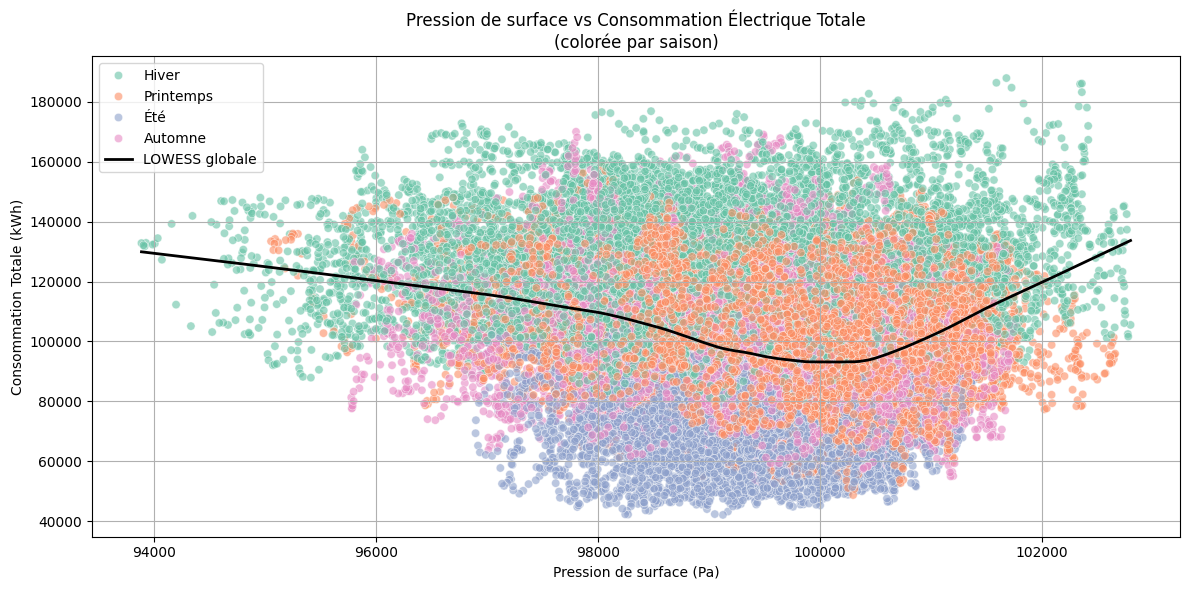

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess

# Étape 1 : Préparation des données
df_daily = df_alesund_data.groupby('Date').agg({
    'VOLUME_KWH': 'sum',
    'surface_pressure': 'first'
}).reset_index()

# Convertir la date si nécessaire
df_daily['Date'] = pd.to_datetime(df_daily['Date'])

# Ajouter la colonne "saison"
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Hiver'
    elif month in [3, 4, 5]:
        return 'Printemps'
    elif month in [6, 7, 8]:
        return 'Été'
    else:
        return 'Automne'

df_daily['Saison'] = df_daily['Date'].apply(get_season)

# Étape 2 : LOWESS global
smoothed = lowess(df_daily['VOLUME_KWH'], df_daily['surface_pressure'], frac=0.3)

# Étape 3 : Visualisation
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_daily,
    x='surface_pressure',
    y='VOLUME_KWH',
    hue='Saison',
    palette='Set2',
    alpha=0.6
)

# Courbe LOWESS globale
plt.plot(smoothed[:, 0], smoothed[:, 1], color='black', linewidth=2, label='LOWESS globale')

# Mise en forme
plt.title("Pression de surface vs Consommation Électrique Totale\n(colorée par saison)")
plt.xlabel("Pression de surface (Pa)")
plt.ylabel("Consommation Totale (kWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


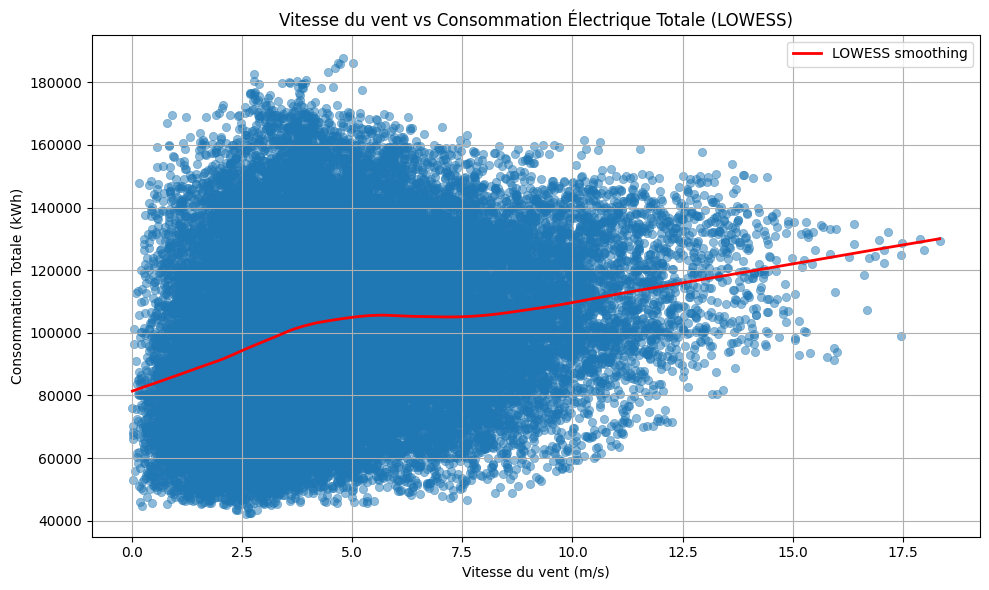

In [20]:
# Agrégation par date
df_daily = df_alesund_data.groupby('Date').agg({
    'VOLUME_KWH': 'sum',         # Consommation totale des 3 groupes
    'wind_speed': 'first'        # Vitesse du vent (même valeur pour tous les groupes à la date donnée)
}).reset_index()

# Lissage LOWESS
lowess = sm.nonparametric.lowess
smoothed = lowess(df_daily['VOLUME_KWH'], df_daily['wind_speed'], frac=0.3)

# Visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_daily, x='wind_speed', y='VOLUME_KWH', alpha=0.5, edgecolor=None)
plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', linewidth=2, label='LOWESS smoothing')
plt.title("Vitesse du vent vs Consommation Électrique Totale (LOWESS)")
plt.xlabel("Vitesse du vent (m/s)")
plt.ylabel("Consommation Totale (kWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



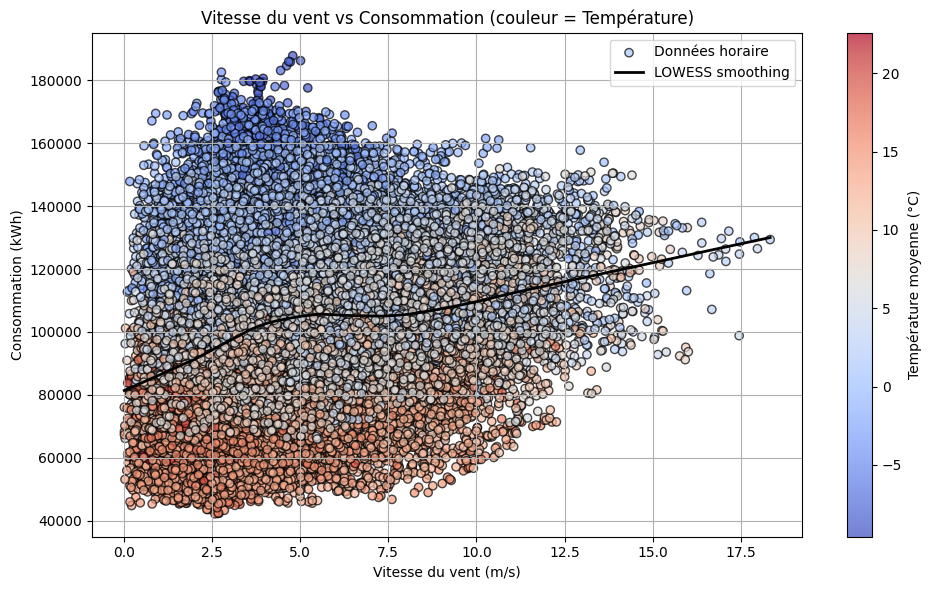

In [21]:

# Agrégation par date
df_daily = df_alesund_data.groupby('Date').agg({
    'VOLUME_KWH': 'sum',
    'wind_speed': 'first',
    't2m_C': 'first'  
}).reset_index()

# LOWESS smoothing (x = wind, y = consommation)
lowess = sm.nonparametric.lowess
smoothed = lowess(df_daily['VOLUME_KWH'], df_daily['wind_speed'], frac=0.3)

# Visualisation avec température comme couleur
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df_daily['wind_speed'], 
    df_daily['VOLUME_KWH'], 
    c=df_daily['t2m_C'], 
    cmap='coolwarm', 
    alpha=0.7, 
    edgecolors='k',
    label='Données horaire'
)

# Ajouter la courbe LOWESS
plt.plot(smoothed[:, 0], smoothed[:, 1], color='black', linewidth=2, label='LOWESS smoothing')

# Ajouter la barre de couleur (température)
cbar = plt.colorbar(scatter)
cbar.set_label('Température moyenne (°C)')

# Mise en forme
plt.title("Vitesse du vent vs Consommation (couleur = Température)")
plt.xlabel("Vitesse du vent (m/s)")
plt.ylabel("Consommation (kWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
df_alesund_data.index = pd.to_datetime(df_alesund_data.index)

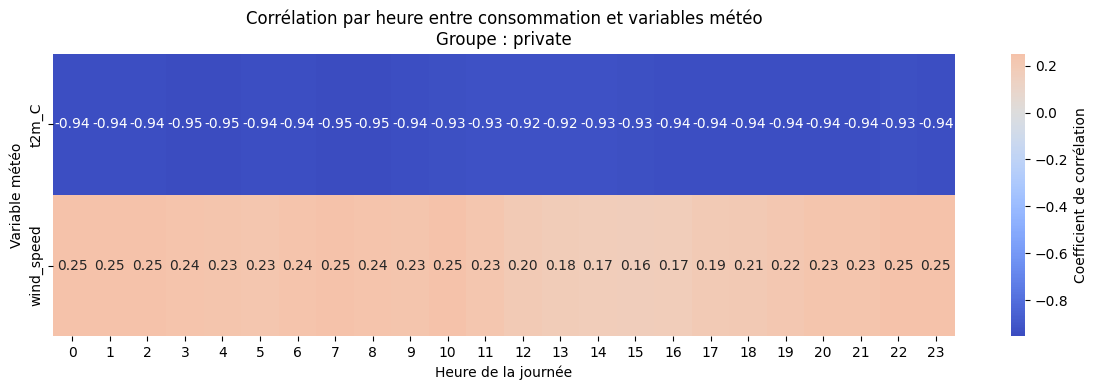

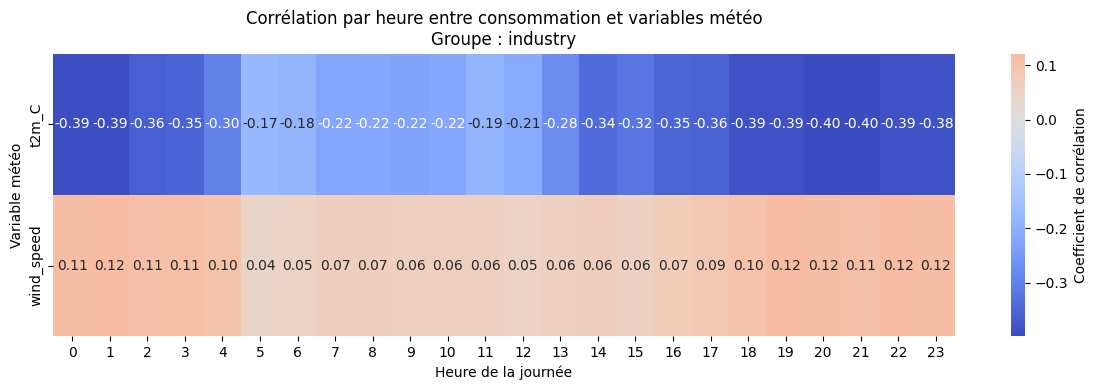

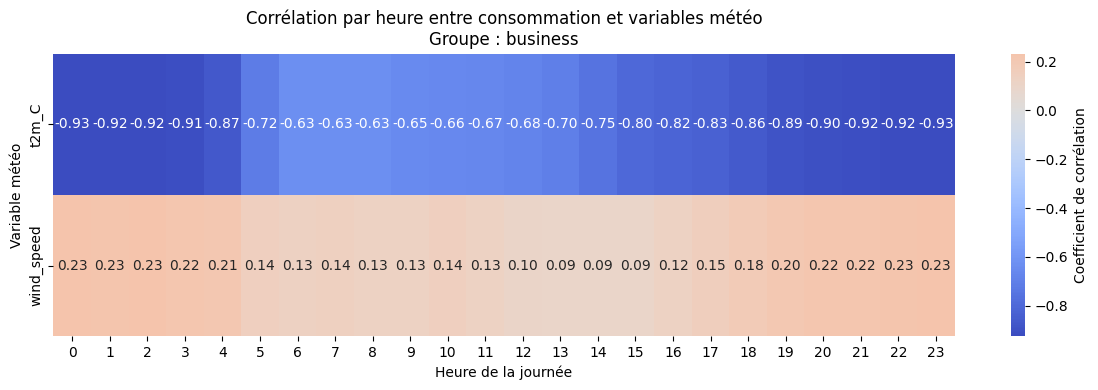

In [23]:


# Récupération des groupes uniques
groupes = df_alesund_data['Consumption_group_Ålesund'].unique()

for groupe in groupes:
    subset_groupe = df_alesund_data[df_alesund_data['Consumption_group_Ålesund'] == groupe]
    
    # Initialiser un dictionnaire pour stocker les corrélations par heure pour ce groupe
    corr_by_hour = {
        't2m_C': [],
        'wind_speed': []
    }

    # Calcul des corrélations heure par heure pour ce groupe
    for h in range(24):
        subset = subset_groupe[subset_groupe.index.hour == h]

        # Vérifier que subset n'est pas vide pour éviter erreurs
        if not subset.empty:
            corr_temp = subset[['t2m_C', 'VOLUME_KWH']].corr().iloc[0, 1]
            corr_wind = subset[['wind_speed', 'VOLUME_KWH']].corr().iloc[0, 1]
        else:
            corr_temp = None  # Ou np.nan
            corr_wind = None

        corr_by_hour['t2m_C'].append(corr_temp)
        corr_by_hour['wind_speed'].append(corr_wind)

    # Création d’un DataFrame pivot (lignes = variables, colonnes = heures)
    corr_df = pd.DataFrame(corr_by_hour, index=range(24)).T

    # Visualisation en heatmap pour ce groupe
    plt.figure(figsize=(12, 4))
    sns.heatmap(
        corr_df,
        annot=True,
        cmap='coolwarm',
        center=0,
        fmt=".2f",
        cbar_kws={'label': 'Coefficient de corrélation'}
    )
    plt.title(f"Corrélation par heure entre consommation et variables météo\nGroupe : {groupe}")
    plt.xlabel("Heure de la journée")
    plt.ylabel("Variable météo")
    plt.tight_layout()
    plt.show()


In [24]:
import statsmodels.api as sm
#  Agréger et préparer les données
df_tot = df_alesund_data.groupby('Date').agg({
    'VOLUME_KWH': 'sum',
    'wind_speed': 'first',
    't2m_C': 'first',
    'surface_pressure':'first'
}).reset_index()
X = df_tot[['t2m_C', 'surface_pressure', 'wind_speed']]

y = df_tot['VOLUME_KWH']
# Supposons que X est déjà préparé (avec dummies) et y est défini
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Résumé des coefficients
summary_df = pd.DataFrame({
    'coef': model.params,
    'p_value': model.pvalues
})

# Ajout d’un verdict automatique
summary_df['impact'] = summary_df['p_value'] < 0.05

# Résultat lisible
summary_df



coef        p_value  impact
const             164425.277158  3.310596e-139    True
t2m_C              -3798.270082   0.000000e+00    True
surface_pressure      -0.428662   5.920606e-11    True
wind_speed          1177.890901  1.750452e-297    True